Name : Jae-hong Park

Student ID : 2017120175

Github Link : https://github.com/westsun0920/Assignment07

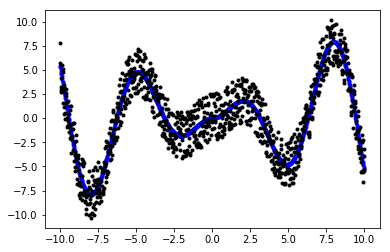

In [55]:
import numpy as np
import matplotlib.pyplot as plt

num     = 1001
std     = 5 

# x  : x-coordinate data
# y1 : (noisy) y-coordinate data
# y2 : (clean) y-coordinate data 

def fun(x):
 
	# f = np.sin(x) * (1 / (1 + np.exp(-x))) 
	f = np.abs(x) * np.sin(x)

	return f

n       = np.random.rand(num)
nn      = n - np.mean(n) #편차
x       = np.linspace(-10,10,num)
y1      = fun(x)
y2      = y1 + nn * std

plt.plot(x, y1, 'b.', x, y2, 'k.')
plt.show()

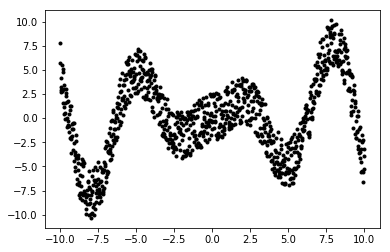

In [56]:
plt.plot(x, y2, 'k.')
plt.show()

# Least square approximation

In [57]:
def computeApp(v_X,v_Y):
    v_X = np.mat(v_X)
    v_Y = np.mat(v_Y).T
    ATA = v_X.T * v_X
    if(np.linalg.det(ATA) == 0.0): 
        return
    theta = ATA.I * (v_X.T * v_Y)
    return theta

# Computing the error

In [58]:
def computeE(v_1, v_2):
    error = 0
    for i in range(0, len(v_1)):
        error += np.sqrt((float(v_1[i]) - float(v_2[i]))**2)
    return np.sqrt(error)

# Generating the A matrix

In [59]:
def func(n):
    dimensions = []; d_X = []; var = []; theta = []; y = []; y_ = []
    for i in range(0, len(x)):
        d_X = []
        for j in range(0, n+1):
                d_X.append(x[i]**j)
        dimensions.append(d_X)
    dimensions = np.mat(dimensions)
    theta = computeApp(dimensions, y2)
    print('theta:\n', theta)
    for j in range(0, n+1):
        var = []
        var = (x**j)*(float(theta[j]))
        y_.append(var)
    y_ = np.mat(y_)
    y_ = y_.T
    for i in range(0, len(y_)):
        sum_ = np.sum(y_[i])
        y.append(float(sum_))
    return y

# Training

In [60]:
def training(n): 
    error = []; y = []
    y = func(n)
    error = computeE(y2, y)
    Ylabel = n,' dimension'
    visual(x, y, y2)
    return error

# Visualization

In [61]:
def visual(x, y, y2):
    plt.plot(x, y, 'r', x, y2, 'b.')
    title ='Polynomial'
    plt.title(title)
    plt.show()

# $\hat{f}(x) =  \theta_0 x_0 +  \theta_2 x +  \theta_3 x^2 + \cdot\cdot\cdot+ \theta_{p-1} x^{p-1}$

theta:
 [[-1.4906491e-16]]


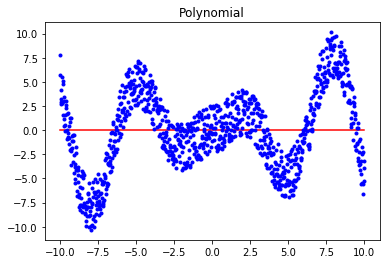

theta:
 [[-7.54305079e-16]
 [ 2.13857526e-01]]


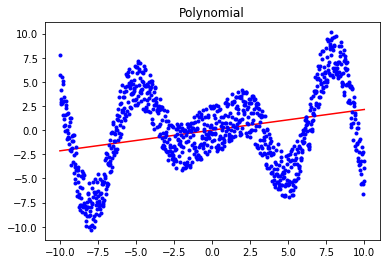

theta:
 [[ 0.06132918]
 [ 0.21385753]
 [-0.0018362 ]]


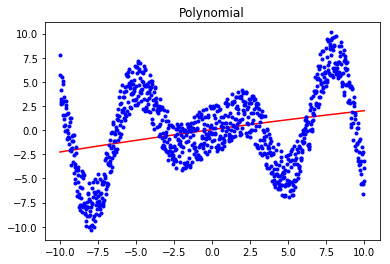

theta:
 [[ 0.06132918]
 [-0.12409313]
 [-0.0018362 ]
 [ 0.00562128]]


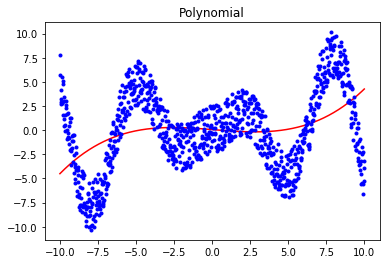

theta:
 [[ 9.55801739e-02]
 [-1.24093133e-01]
 [-5.25448186e-03]
 [ 5.62127593e-03]
 [ 3.98004523e-05]]


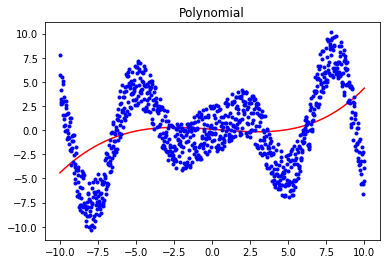

theta:
 [[ 9.55801739e-02]
 [-1.45415701e+00]
 [-5.25448186e-03]
 [ 6.75674853e-02]
 [ 3.98004523e-05]
 [-5.56406410e-04]]


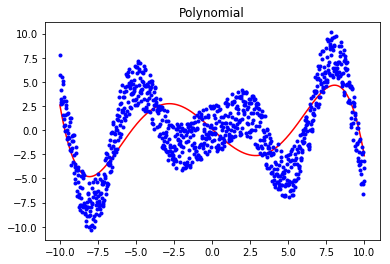

theta:
 [[ 5.17179289e-02]
 [-1.45415701e+00]
 [ 3.93831430e-03]
 [ 6.75674853e-02]
 [-2.35435896e-04]
 [-5.56406410e-04]
 [ 2.01438991e-06]]


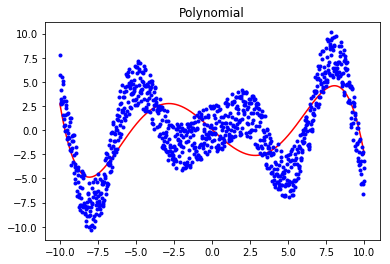

theta:
 [[ 5.17179289e-02]
 [ 4.02842436e-01]
 [ 3.93831430e-03]
 [-9.92315355e-02]
 [-2.35435896e-04]
 [ 3.10590115e-03]
 [ 2.01438991e-06]
 [-2.26264765e-05]]


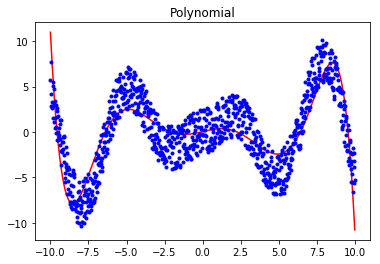

theta:
 [[ 2.43844864e-02]
 [ 4.02842436e-01]
 [ 1.37589284e-02]
 [-9.92315355e-02]
 [-7.74502681e-04]
 [ 3.10590115e-03]
 [ 1.13397438e-05]
 [-2.26264765e-05]
 [-4.98584334e-08]]


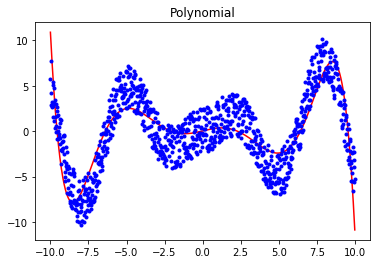

theta:
 [[ 2.43844864e-02]
 [ 2.14153122e+00]
 [ 1.37589284e-02]
 [-3.53737170e-01]
 [-7.74502681e-04]
 [ 1.30120661e-02]
 [ 1.13397438e-05]
 [-1.63864127e-04]
 [-4.98584334e-08]
 [ 6.65639826e-07]]


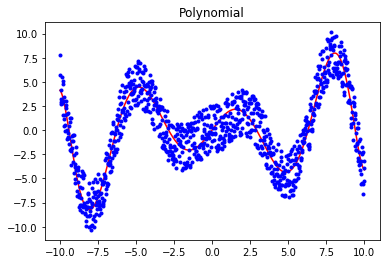

In [62]:
error = []
for p in range(0, 10):
    err = training(p)
    error.append(err)

# Visualization of Error

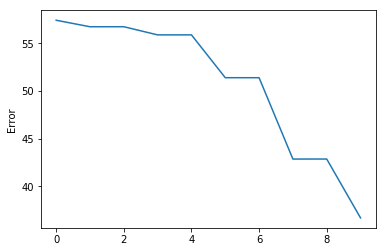

In [63]:
x_axis = np.arange(0, 10, 1)
plt.plot(x_axis, error)
ylab = 'Error'
plt.ylabel(ylab)
plt.show()